# Assignment 5:  Due 10/7

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [4]:
df = pd.read_csv('data/nobel.csv')

# 1b)

Display below the output from the DataFrame functions *info*.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


# 1c)

Show the first 5 listings of the dataset.

In [6]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [22]:
null_values = df.isnull().sum(axis = 0)
print(null_values)

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64


In [25]:
total_null_values = sum(null_values)
print(total_null_values)
# So total null values is 1912

1912


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

Text(0, 0.5, 'Number of Winners')

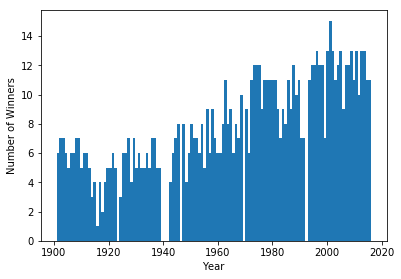

In [117]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(df.year,bins =120);
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Winners')

It looks like the least amount of prizes were awarded around the 1910s leading into the 1920s.

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [39]:
counts = df.groupby('category').size()
print(counts)

category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
dtype: int64


The Medicine category has the most prizes awarded.

# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [43]:
count = df.groupby('prize_share').size()
total_count = sum(count)
count_percentage = count/total_count
print(count_percentage)
# Outputs ratio of prizes awarded according to prize_shares category

prize_share
1/1    0.377607
1/2    0.335895
1/3    0.220637
1/4    0.065862
dtype: float64


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

49 females won and 836 males won.


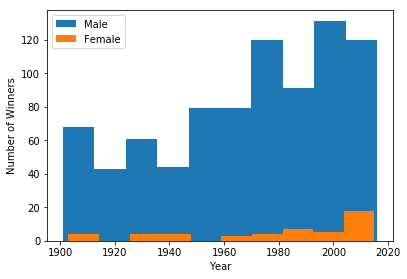

In [76]:
males_females = count = df.groupby('sex').size()
print('{0} females won and {1} males won.'.format(males_females[0],males_females[1]))
df_male = df[df['sex'] == 'Male']
df_female = df[df['sex'] == 'Female']
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.hist(df_male.year,label = "Male");
ax2.hist(df_female.year,label = "Female");
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Winners')
ax2.legend()

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [78]:
usa_winners = sum(df['birth_country'] == 'United States of America')
print(usa_winners)

259


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [129]:
birth_year = pd.DatetimeIndex(df.birth_date).year
age = df.year - birth_year
df['Age'] = age
# This adds an age column to the dataframe
mx = max(age)
max_index = [i for i, j in enumerate(age) if j == mx]
mn = min(age)
min_index = [k for k, l in enumerate(age) if l == mn]
oldest_winner = df.iloc[max_index[0]].full_name
youngest_winner = df.iloc[min_index[0]].full_name
oldest_winner_age = df.iloc[max_index[0]].Age
youngest_winner_age = df.iloc[min_index[0]].Age
print('The youngest winner was {0} at {1} years and the oldest was {2} at {3} years'.format(youngest_winner,youngest_winner_age,oldest_winner,oldest_winner_age))


The youngest winner was Malala Yousafzai at 17.0 years and the oldest was Leonid Hurwicz at 90.0 years


In [130]:
avg = df.Age.mean()
std = df.Age.std()
print('The mean was {0} and the standard deviation was {1}'.format(avg,std))

The mean was 59.453001132502834 and the standard deviation was 12.39929042786365


Text(0, 0.5, 'Number of Winners')

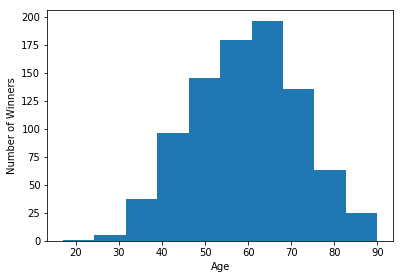

In [131]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0.1,0.1,0.8,0.8])
ax3.hist(df.Age);
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Winners')

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [134]:
df_copy = df
df_copy.drop('laureate_id',axis=1,inplace=True)
df_copy.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0


# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

Age column was already added in Problem 8 on the third line.